# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [ ]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [ ]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [ ]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

Предобработка данных:


In [ ]:
data = data.convert_dtypes()
print("Data types for each columns:")
print(data.dtypes)
print("Data before replacing: ")
for i in data.columns:
    print(i, end=" ")
    print(data[i].unique())
data.sex.replace(to_replace={"m" : "M"}, inplace=True)
data.Pstatus.replace(to_replace={"t" : "T"}, inplace=True)
data.Medu.replace(to_replace={"o" : '0', 0:'0'}, inplace=True)
data.Fedu.replace(to_replace={"o" : '0', 0:'0'}, inplace=True)
data.Mjob.replace(to_replace={"at-home" : "at_home"}, inplace=True)
data.Fjob.replace(to_replace={"at-home" : "at_home"}, inplace=True)
data.guardian.replace(to_replace={"futher" : "father"}, inplace=True)
data = data.convert_dtypes()
data["Fedu"] = data["Fedu"].astype(int)
data["Medu"] = data["Medu"].astype(int)
print("Data after replacing: ")
for i in data.columns:
    print(i, end=" ")
    print(data[i].unique())
data = data.drop("ID", axis = 1)
data.info()

Data types for each columns:
ID             Int64
Subject       string
school        string
sex           string
age            Int64
address       string
famsize       string
Pstatus       string
Medu          string
Fedu          string
Mjob          string
Fjob          string
reason        string
guardian      string
traveltime     Int64
studytime      Int64
failures       Int64
schoolsup     string
famsup        string
paid          string
activities    string
nursery       string
higher        string
internet      string
romantic      string
famrel         Int64
freetime       Int64
goout          Int64
Dalc           Int64
Walc           Int64
health         Int64
absences       Int64
cheating      string
G1             Int64
G2             Int64
G3             Int64
dtype: object
Data before replacing: 
ID <IntegerArray>
[100097, 101021, 102965, 102989, 103131, 103144, 105257, 107639, 107914,
 108089,
 ...
 990885, 990942, 993398, 995838, 996164, 997832, 997897, 998425, 999143,

In [ ]:
print("Number of NaN: " + str(data.isna().sum().sum()))
print("Columns that contains Nan:", end=" ")
print(data.columns[data.isna().any()].tolist())
print(data.isna().sum())
data["cheating"] = data["cheating"].fillna("no")
data = data.dropna()
data

Number of NaN: 740
Columns that contains Nan: ['romantic', 'famrel', 'Dalc', 'Walc', 'cheating']
Subject         0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic       10
famrel         10
freetime        0
goout           0
Dalc           10
Walc           10
health          0
absences        0
cheating      700
G1              0
G2              0
G3              0
dtype: int64


,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,no,15,13,14
1,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,no,17,18,17
2,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,yes,9,8,10
3,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,no,14,15,16
5,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3,3,4,4,5,4,2,no,11,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Por,MS,F,15,R,GT3,T,3,3,services,other,reputation,mother,1,2,0,no,yes,no,no,yes,yes,yes,yes,4,5,4,1,1,1,4,no,13,12,12
1038,Por,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,no,13,12,13
1039,Math,GP,F,15,R,GT3,T,3,3,services,services,reputation,other,2,3,2,no,yes,yes,yes,yes,yes,yes,yes,4,2,1,2,3,3,8,no,10,10,10
1040,Por,GP,M,15,R,GT3,T,2,1,health,services,reputation,mother,1,2,0,no,no,no,yes,yes,yes,yes,yes,5,4,2,1,1,5,4,no,10,9,10


Зависимость итоговой оценки от числовых признаков:

In [ ]:
cor = data.corr()
cor["G3"]

age          -0.117976
Medu          0.207814
Fedu          0.164776
traveltime   -0.112519
studytime     0.158775
failures     -0.382542
famrel        0.052474
freetime     -0.057242
goout        -0.092770
Dalc         -0.125858
Walc         -0.110614
health       -0.070054
absences     -0.043690
G1            0.807610
G2            0.910560
G3            1.000000
Name: G3, dtype: float64

Зависимость итоговой оценки от категориальных признаков:


In [ ]:
categoricalColumns = ["Subject", "school", "sex", "address", "famsize", "Pstatus",
                          "Mjob", "Fjob", "reason", "guardian",
                          "schoolsup", "famsup", "paid", "activities", "nursery",
                          "higher", "internet", "romantic", "cheating"]
df = pd.get_dummies(data = data[categoricalColumns], prefix=categoricalColumns, columns = categoricalColumns)
df["G3"] = data["G3"]
cor = df.corr()
cor["G3"]

Subject_Math        -0.194425
Subject_Por          0.194425
school_GP            0.116344
school_MS           -0.116344
sex_F                0.029187
sex_M               -0.029187
address_R           -0.112852
address_U            0.112852
famsize_GT3         -0.056160
famsize_LE3          0.056160
Pstatus_A            0.023798
Pstatus_T           -0.023798
Mjob_at_home        -0.111212
Mjob_health          0.104835
Mjob_other          -0.072740
Mjob_services        0.047449
Mjob_teacher         0.093376
Fjob_at_home        -0.020266
Fjob_health          0.045908
Fjob_other          -0.032220
Fjob_services       -0.027232
Fjob_teacher         0.101718
reason_course       -0.085107
reason_home          0.008895
reason_other        -0.046167
reason_reputation    0.123305
guardian_father      0.044285
guardian_mother      0.006613
guardian_other      -0.085447
schoolsup_no         0.069563
schoolsup_yes       -0.069563
famsup_no           -0.016054
famsup_yes           0.016054
paid_no   

Исходя из полученных данных я решил, что можно убрать все признаки, где коэффицент корреляции по модую меньше 0.07.

In [ ]:
data = data.drop(columns=["sex", "famsize", "Pstatus", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "cheating",
                         "famrel", "freetime", "absences"], )
data

,Subject,school,age,address,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,higher,internet,romantic,goout,Dalc,Walc,health,G1,G2,G3
0,Por,GP,16,U,3,4,services,other,course,1,1,0,yes,yes,no,1,1,4,5,15,13,14
1,Por,GP,17,U,3,2,other,other,course,1,2,0,yes,yes,no,4,1,3,3,17,18,17
2,Por,GP,16,U,1,2,health,services,course,2,1,2,yes,yes,no,5,3,5,5,9,8,10
3,Por,MS,17,U,2,3,other,services,home,2,2,0,yes,yes,no,3,1,1,3,14,15,16
5,Por,GP,18,U,3,1,services,services,course,2,1,0,yes,yes,yes,4,4,5,4,11,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Por,MS,15,R,3,3,services,other,reputation,1,2,0,yes,yes,yes,4,1,1,1,13,12,12
1038,Por,GP,16,U,2,2,other,other,home,1,2,0,yes,yes,no,4,1,1,3,13,12,13
1039,Math,GP,15,R,3,3,services,services,reputation,2,3,2,yes,yes,yes,1,2,3,3,10,10,10
1040,Por,GP,15,R,2,1,health,services,reputation,1,2,0,yes,yes,yes,2,1,1,5,10,9,10


Снижение количества признаков поможет получить более высокое качество обучения моделей

После удаления признаков нужно до конца обработать данные

In [ ]:
from sklearn.preprocessing import normalize, StandardScaler

In [ ]:
categoricalColumns = ["Subject", "school", "address",
                          "Mjob", "Fjob", "reason",
                          "higher", "internet", "romantic"]
data = pd.get_dummies(data = data[categoricalColumns], prefix=categoricalColumns, columns = categoricalColumns).join(data)
data = data.drop(columns=categoricalColumns)
columns = data.columns
target = data["G3"]
data.drop(columns=["G3"])
data = pd.DataFrame(StandardScaler().fit_transform(data), columns=columns)
data


,Subject_Math,Subject_Por,school_GP,school_MS,address_R,address_U,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,age,Medu,Fedu,traveltime,studytime,failures,goout,Dalc,Walc,health,G1,G2,G3
0,-0.780368,0.780368,0.597291,-0.597291,-0.614190,0.614190,-0.478420,-0.294245,-0.791978,1.839641,-0.370179,-0.256549,-0.201034,0.895831,-0.629590,-0.254337,1.188891,-0.569683,-0.34357,-0.554339,-0.308017,0.308017,-0.514280,0.514280,0.757409,-0.757409,-0.597432,0.354688,1.467840,-0.712769,-1.156950,-0.402261,-1.870341,-0.544783,1.329363,1.025164,1.272141,0.538119,0.692334
1,-0.780368,0.780368,0.597291,-0.597291,-0.614190,0.614190,-0.478420,-0.294245,1.262662,-0.543584,-0.370179,-0.256549,-0.201034,0.895831,-0.629590,-0.254337,1.188891,-0.569683,-0.34357,-0.554339,-0.308017,0.308017,-0.514280,0.514280,0.757409,-0.757409,0.208780,0.354688,-0.354932,-0.712769,0.031973,-0.402261,0.723336,-0.544783,0.553386,-0.380935,1.941548,2.060011,1.467830
2,-0.780368,0.780368,0.597291,-0.597291,-0.614190,0.614190,-0.478420,3.398529,-0.791978,-0.543584,-0.370179,-0.256549,-0.201034,-1.116282,1.588335,-0.254337,1.188891,-0.569683,-0.34357,-0.554339,-0.308017,0.308017,-0.514280,0.514280,0.757409,-0.757409,-0.597432,-1.430307,-0.354932,0.647725,-1.156950,2.634355,1.587895,1.643064,2.105339,1.025164,-0.736081,-0.983773,-0.341661
3,-0.780368,0.780368,-1.674225,1.674225,-0.614190,0.614190,-0.478420,-0.294245,1.262662,-0.543584,-0.370179,-0.256549,-0.201034,-1.116282,1.588335,-0.254337,-0.841120,1.755363,-0.34357,-0.554339,-0.308017,0.308017,-0.514280,0.514280,0.757409,-0.757409,0.208780,-0.537810,0.556454,0.647725,0.031973,-0.402261,-0.141223,-0.544783,-0.998568,-0.380935,0.937437,1.146876,1.209331
4,-0.780368,0.780368,0.597291,-0.597291,-0.614190,0.614190,-0.478420,-0.294245,-0.791978,1.839641,-0.370179,-0.256549,-0.201034,-1.116282,1.588335,-0.254337,1.188891,-0.569683,-0.34357,-0.554339,-0.308017,0.308017,-0.514280,0.514280,-1.320291,1.320291,1.014992,0.354688,-1.266319,0.647725,-1.156950,-0.402261,0.723336,2.736988,2.105339,0.322114,-0.066674,-0.070638,0.175336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,-0.780368,0.780368,-1.674225,1.674225,1.628161,-1.628161,-0.478420,-0.294245,-0.791978,1.839641,-0.370179,-0.256549,-0.201034,0.895831,-0.629590,-0.254337,-0.841120,-0.569683,-0.34357,1.803950,-0.308017,0.308017,-0.514280,0.514280,-1.320291,1.320291,-1.403643,0.354688,0.556454,-0.712769,0.031973,-0.402261,0.723336,-0.544783,-0.998568,-1.787034,0.602733,0.233741,0.175336
1000,-0.780368,0.780368,0.597291,-0.597291,-0.614190,0.614190,-0.478420,-0.294245,1.262662,-0.543584,-0.370179,-0.256549,-0.201034,0.895831,-0.629590,-0.254337,-0.841120,1.755363,-0.34357,-0.554339,-0.308017,0.308017,-0.514280,0.514280,0.757409,-0.757409,-0.597432,-0.537810,-0.354932,-0.712769,0.031973,-0.402261,0.723336,-0.544783,-0.998568,-0.380935,0.602733,0.233741,0.433835
1001,1.281447,-1.281447,0.597291,-0.597291,1.628161,-1.628161,-0.478420,-0.294245,-0.791978,1.839641,-0.370179,-0.256549,-0.201034,-1.116282,1.588335,-0.254337,-0.841120,-0.569683,-0.34357,1.803950,-0.308017,0.308017,-0.514280,0.514280,-1.320291,1.320291,-1.403643,0.354688,0.556454,0.647725,1.220897,2.634355,-1.870341,0.549141,0.553386,-0.380935,-0.401378,-0.375016,-0.341661
1002,-0.780368,0.780368,0.597291,-0.597291,1.628161,-1.628161,-0.478420,3.398529,-0.791978,-0.543584,-0.370179,-0.256549,-0.201034,-1.116282,1.588335,-0.254337,-0.841120,-0.569683,-0.34357,1.803950,-0.308017,0.308017,-0.514280,0.514280,-1.320291,1.320291,-1.403643,-0.537810,-1.266319,-0.712769,0.031973,-0.402261,-1.005782,-0.544783,-0.998568,1.025164,-0.401378,-0.679394,-0.341661


Разделение данных:

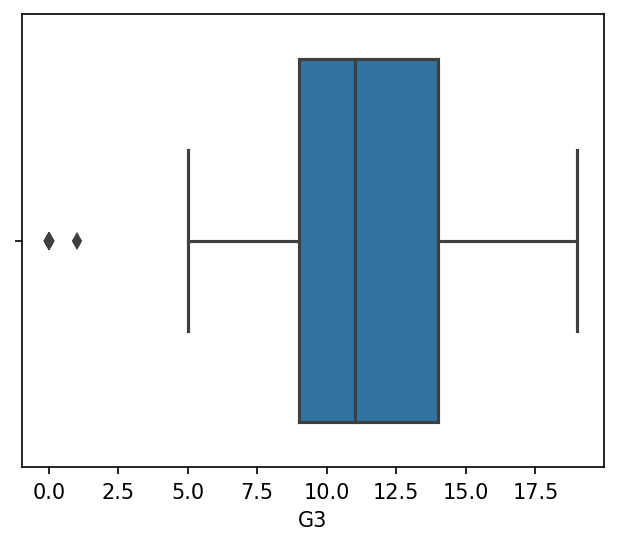

In [ ]:
from sklearn.model_selection import train_test_split
plt.figure(figsize=(5, 4), dpi=150)
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["G3"]), target, test_size=0.2)
sns.boxplot(y_test)
plt.show()

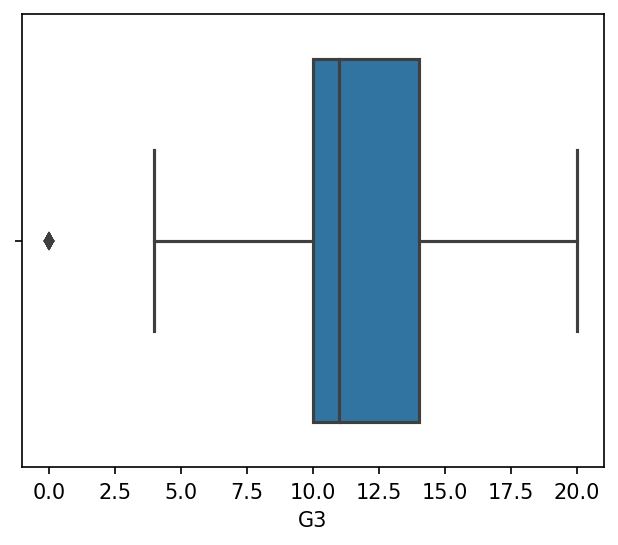

In [ ]:
plt.figure(figsize=(5, 4), dpi=150)
sns.boxplot(y_train)
plt.show()

Как мы видим из этих графиков распределение целевой переменной в нашем разбиение примерно одинаковое.

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

#### Линейная регрессия + регуляризации

In [ ]:
!pip install scikit-learn==0.24.1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
data_train = X_train.drop(columns=["G2"])
linreg = LinearRegression()
linreg.fit(data_train, y_train)
y_pred = linreg.predict(X_test.drop(columns=["G2"]))

In [ ]:
print("Test Linear:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Linear:
MSE: 6.652620140778129
MAE: 1.5777669821667895
R2: 0.6315903733440744


In [ ]:
coefs = pd.Series(linreg.coef_, index=data_train.columns)
z = abs(coefs).sort_values(ascending=False)
coefs[z.index]

Fjob_other          -5.143026e+13
Fjob_services       -4.665780e+13
address_U            3.616948e+13
address_R            3.616948e+13
Fjob_at_home        -2.490914e+13
Fjob_teacher        -2.472055e+13
school_MS            2.183995e+13
school_GP            2.183995e+13
Fjob_health         -1.999555e+13
reason_course       -1.493354e+13
reason_home         -1.303856e+13
reason_reputation   -1.285476e+13
internet_yes         1.023893e+13
internet_no          1.023893e+13
Mjob_other           9.496389e+12
reason_other        -9.315766e+12
Mjob_services        8.187079e+12
Mjob_at_home         7.596127e+12
Mjob_teacher         6.352336e+12
Mjob_health          5.283739e+12
romantic_no          4.854678e+12
romantic_yes         4.854678e+12
higher_yes           4.059024e+12
higher_no            4.059024e+12
Subject_Math        -2.684523e+10
Subject_Por         -2.684523e+10
G1                   2.853943e+00
failures            -3.479451e-01
health              -1.377884e-01
goout         

Я не вижу никакой зависимости в таком распределении коэффицентов.

In [ ]:
linreg = LinearRegression()
linreg.fit(data_train.drop(columns=["G1"]), y_train)
y_pred = linreg.predict(X_test.drop(columns=["G2", "G1"]))

In [ ]:
print("Test Linear without G1:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Linear without G1:
MSE: 14.740355605049078
MAE: 2.7139219514383037
R2: 0.1837067515782541


Без G1 точность линейной модели упала.

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridgeModel = RidgeCV(alphas=np.arange(0, 30, 0.1), 
                                  cv=5, 
                                  scoring='neg_root_mean_squared_error')
ridgeModel.fit(data_train, y_train)
y_pred = ridgeModel.predict(X_test.drop(columns=["G2"]))

In [ ]:
print("Test Ridge:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Ridge:
MSE: 6.698889629314019
MAE: 1.5678037818715127
R2: 0.6290280558456528


Ridge показало примерно такие же результаты, чем обычная линейная регрессия.

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lassoModel = LassoCV(alphas=np.arange(0.1, 100, 0.1), 
                                  normalize=True,
                                  cv=5)
lassoModel.fit(data_train, y_train)
y_pred = lassoModel.predict(X_test.drop(columns=["G2"]))

In [ ]:
print("Test Lasso:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Lasso:
MSE: 16.57892285501669
MAE: 2.958928490348473
R2: 0.08189034543919071


А Lasso показало не лучшие результаты и не справилось с задачей

#### Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [ ]:
poly = PolynomialFeatures(degree=1)
poly.fit(data_train)
poly_train = poly.transform(data_train)
poly_test = poly.transform(X_test.drop(columns=["G2"]))

При любой степени до 7 выше, чем текущая (больше 7 степени выполнялось слишком долго) программа получала плохие метрики из за переобучения.

In [ ]:
linreg = LinearRegression()
linreg.fit(poly_train, y_train)
y_pred = linreg.predict(poly_test)

In [ ]:
print("Test Polynomial:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Polynomial:
MSE: 6.667057909983039
MAE: 1.5694133796502108
R2: 0.6307908367630028


In [ ]:
coefs = pd.Series(linreg.coef_)
z = abs(coefs).sort_values(ascending=False)
coefs = coefs[z.index]
coefs

1    -3.104860e+13
2    -3.104860e+13
17    2.637442e+13
18    2.302765e+13
20    2.270305e+13
5    -1.912209e+13
6    -1.912209e+13
26   -1.669247e+13
25   -1.669247e+13
19    1.645276e+13
4    -1.238220e+13
3    -1.238220e+13
9    -1.188305e+13
10   -1.024468e+13
7    -9.505212e+12
11   -7.948827e+12
8    -6.611667e+12
24    5.456196e+12
23    5.456196e+12
14    3.028109e+12
15    2.747116e+12
12    1.466599e+12
16    1.455496e+12
13    1.177297e+12
21   -8.709240e+11
22   -8.709240e+11
0     1.499275e+09
37    2.839355e+00
32   -3.587974e-01
36   -1.445312e-01
33   -1.411133e-01
27    7.394255e-02
28    7.019888e-02
29    4.891941e-02
35    4.296875e-02
30    3.767838e-02
31   -1.902260e-02
34   -8.300781e-03
dtype: float64

Слишком много параметров, чтобы определить параметр, который имеет наибольшее влияние.

In [ ]:
poly = PolynomialFeatures(degree=1)
poly.fit(data_train.drop(columns=["G1"]))
poly_train = poly.transform(data_train.drop(columns=["G1"]))
poly_test = poly.transform(X_test.drop(columns=["G2", "G1"]))

In [ ]:
linreg = LinearRegression()
linreg.fit(poly_train, y_train)
y_pred = linreg.predict(poly_test)

In [ ]:
print("Test Polynomial without G1:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Polynomial without G1:
MSE: 14.859322163947766
MAE: 2.7541878875808337
R2: 0.17711860666377843


Без G1, судя по метрикам, не получилось построить хорошую модель для предсказания целевой переменной.

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
param_grid = {'n_neighbors':range(1, 16), 'weights':['uniform', 'distance']}
grid = GridSearchCV(estimator = KNeighborsRegressor(), param_grid=param_grid, scoring='r2')
grid.fit(data_train, y_train)
y_pred = grid.predict(X_test.drop(columns=["G2"]))

In [ ]:
print("Test KNN:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test KNN:
MSE: 12.13774043307629
MAE: 2.3007584397314713
R2: 0.3278346986946503


In [ ]:
param_grid = {'n_neighbors':range(1, 16), 'weights':['uniform', 'distance']}
grid = GridSearchCV(estimator = KNeighborsRegressor(), param_grid=param_grid, scoring='r2')
grid.fit(data_train.drop(columns=["G1"]), y_train)
y_pred = grid.predict(X_test.drop(columns=["G2", "G1"]))

In [ ]:
print("Test KNN without G1:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test KNN without G1:
MSE: 15.401207025613374
MAE: 2.669686738310065
R2: 0.14711003930953692


KNN показывает плохие результаты без G1

#### Деревья решений, Random Forest

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(data_train, y_train)
y_pred = dt_model.predict(X_test.drop(columns=["G2"]))

In [ ]:
print("Test Decision Tree:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Decision Tree:
MSE: 13.73134328358209
MAE: 2.388059701492537
R2: 0.23958396157620876


In [ ]:
rf_model = DecisionTreeRegressor()
y_train=y_train.astype('int')
rf_model.fit(data_train.drop(columns=["G1"]), y_train)
y_pred = rf_model.predict(X_test.drop(columns=["G2", "G1"]))

In [ ]:
print("Test Decision Tree without G1:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Decision Tree without G1:
MSE: 28.611940298507463
MAE: 3.81592039800995
R2: -0.584475593106965


Без G1 метрики получаются хуже.

#### RandomForest:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()
y_train=y_train.astype('int')
rf_model.fit(data_train, y_train)
y_pred = rf_model.predict(X_test.drop(columns=["G2"]))

In [ ]:
print("Test Random Forest:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Random Forest:
MSE: 7.351627363184079
MAE: 1.7256218905472638
R2: 0.5928806643291462


In [ ]:
rf_model = RandomForestRegressor()
y_train=y_train.astype('int')
rf_model.fit(data_train.drop(columns=["G1"]), y_train)
y_pred = rf_model.predict(X_test.drop(columns=["G2", "G1"]))

In [ ]:
print("Test Random Forest without G1:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Random Forest without G1:
MSE: 14.561116039800993
MAE: 2.656407960199005
R2: 0.1936327025445893


Random Forest без G1 тоже показал более плохие результаты


#### Выводы:

Лучшие результаты показали Ridge и Linear регрессии. Они имели наименьшее значение отклонения от истинного результата.

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [ ]:
def to_bin(x):
  return x>=8

In [ ]:
data_train = data_train.drop(columns=["G1"])
y_test_bin = to_bin(y_test)
y_train_bin = to_bin(y_train)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [ ]:
five_fold = StratifiedKFold(n_splits=5, shuffle=True)
tree_models = []
tree_scores = []

for train_index, test_index in five_fold.split(data_train, y_train_bin):
    train_x = data_train.iloc[train_index]
    train_y = y_train_bin.iloc[train_index]
    test_x = data_train.iloc[test_index]
    test_y = y_train_bin.iloc[test_index]
    tree = DecisionTreeClassifier(max_depth=5)
    tree.fit(train_x, train_y)
    tree_models.append(tree)
    tree_scores.append(tree.score(test_x, test_y))

print("CV MEAN SCORE: ", np.mean(tree_scores))
print("All scores: ", ', '.join(list(map(lambda x: "{:.3f}".format(x), tree_scores))))

CV MEAN SCORE:  0.8941459627329191
All scores:  0.913, 0.876, 0.894, 0.900, 0.887


In [ ]:
!apt-get install libmagickwand-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmagickwand-dev is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.9).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


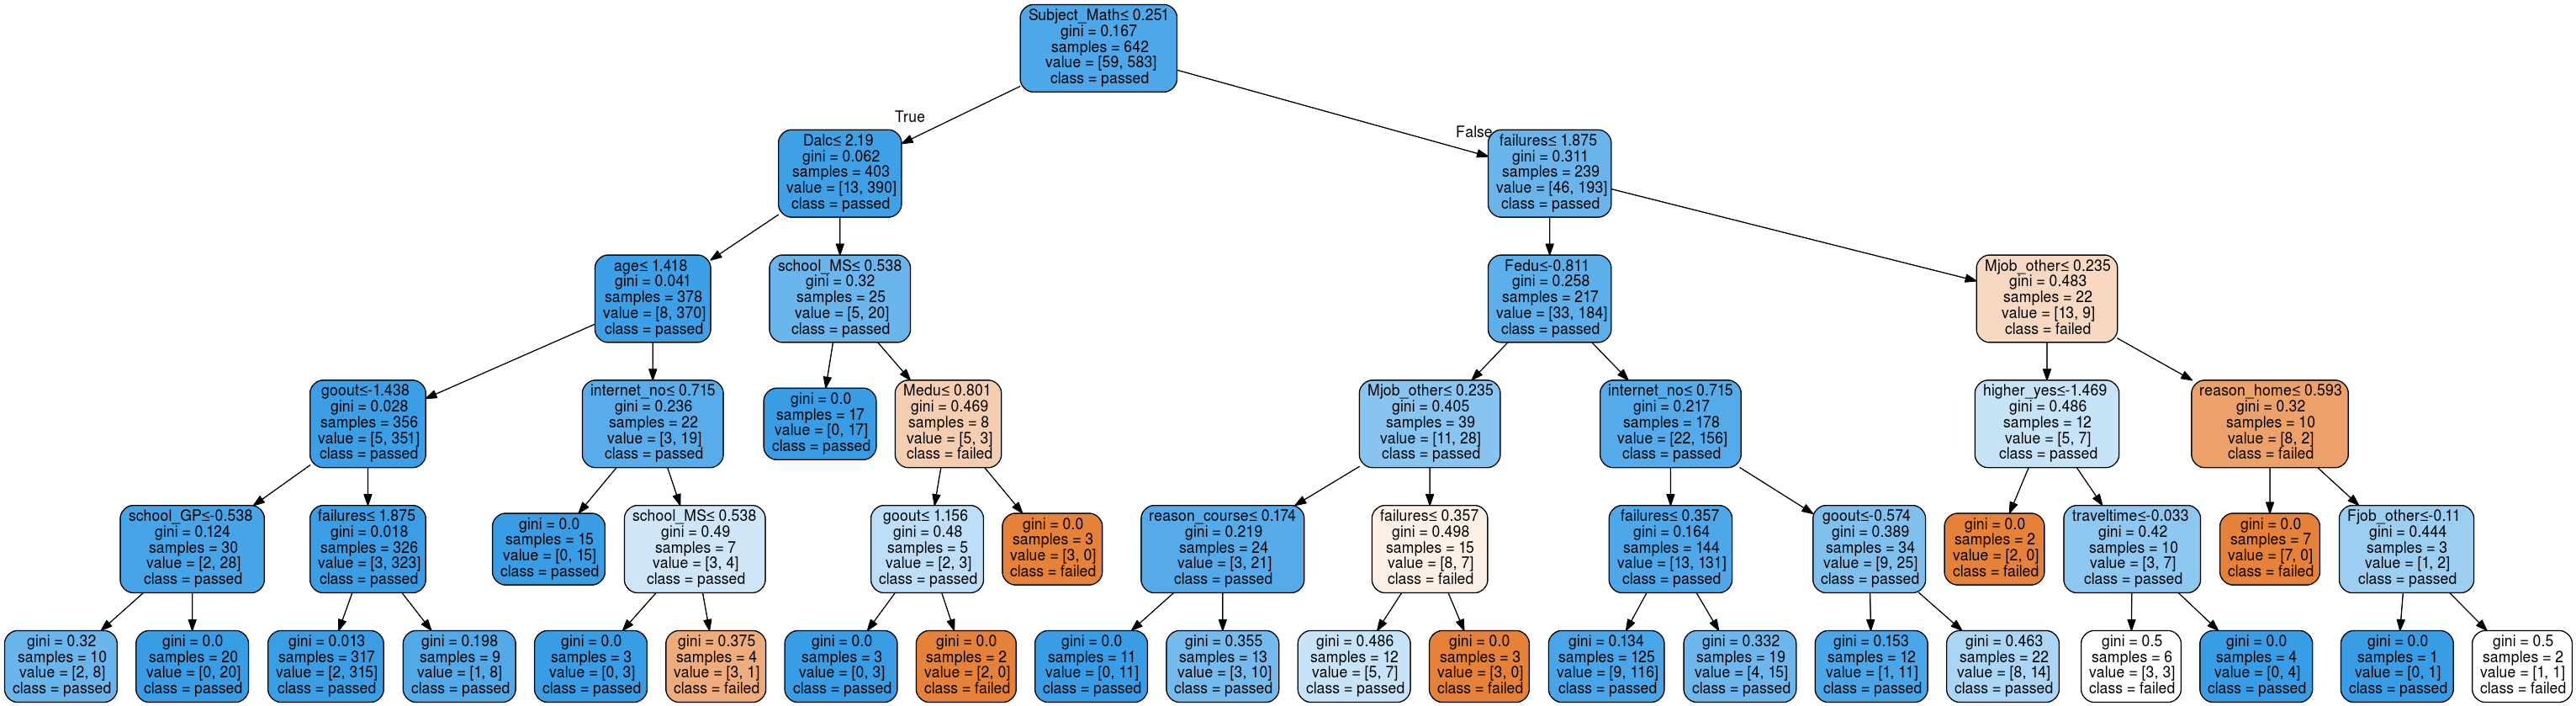

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from wand.image import Image as WImage
tree_image = export_graphviz(tree_models[0], 
                           out_file=None, 
                           feature_names= X_train.drop(columns=["G1", "G2"]).columns, 
                           class_names=['failed','passed'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(tree_image) 
graph.render("tree_image.pdf")
img = WImage(filename="tree_image.pdf")
img

На каждом из уровней рещение принимает по значению выбранной переменной. Посмотреть какая переменная рассматривается и с каким целевым значением идет сравнение можно в 1 строчке каждого узла. 

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tree_models = []
tree_scores = []
five_fold_2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
for tree_number in range(1, 50, 1):
  for train_index, test_index in five_fold_2.split(data_train, y_train_bin):
    train_x = data_train.iloc[train_index]
    train_y = y_train_bin.iloc[train_index]
    test_x = data_train.iloc[test_index]
    test_y = y_train_bin.iloc[test_index]
    tree = RandomForestClassifier(max_depth=5, n_estimators=tree_number)
    tree.fit(train_x, train_y)
    tree_scores.append(tree.score(test_x, test_y))

print("CV MEAN SCORE: ", np.mean(tree_scores))
print("All scores: ", ', '.join(list(map(lambda x: "{:.3f}".format(x), tree_scores))))

CV MEAN SCORE:  0.9073018601850676
All scores:  0.888, 0.863, 0.882, 0.894, 0.875, 0.882, 0.919, 0.894, 0.856, 0.863, 0.894, 0.888, 0.857, 0.894, 0.894, 0.876, 0.870, 0.882, 0.875, 0.856, 0.913, 0.888, 0.901, 0.906, 0.906, 0.913, 0.894, 0.913, 0.887, 0.912, 0.894, 0.913, 0.901, 0.906, 0.906, 0.907, 0.901, 0.907, 0.900, 0.906, 0.901, 0.919, 0.913, 0.919, 0.912, 0.901, 0.913, 0.907, 0.925, 0.900, 0.913, 0.907, 0.907, 0.906, 0.912, 0.894, 0.907, 0.907, 0.906, 0.900, 0.907, 0.913, 0.913, 0.919, 0.906, 0.913, 0.907, 0.901, 0.912, 0.894, 0.888, 0.907, 0.913, 0.906, 0.906, 0.913, 0.901, 0.901, 0.900, 0.906, 0.907, 0.913, 0.907, 0.912, 0.906, 0.913, 0.907, 0.907, 0.925, 0.906, 0.907, 0.907, 0.913, 0.912, 0.887, 0.913, 0.913, 0.913, 0.894, 0.912, 0.907, 0.907, 0.907, 0.925, 0.906, 0.901, 0.907, 0.907, 0.912, 0.906, 0.919, 0.907, 0.901, 0.912, 0.906, 0.913, 0.907, 0.913, 0.912, 0.906, 0.913, 0.907, 0.907, 0.912, 0.906, 0.907, 0.907, 0.913, 0.912, 0.900, 0.913, 0.901, 0.913, 0.912, 0.894, 0.907, 

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [ ]:
# your code here

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [ ]:
# your code here

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [ ]:
!pip install catboost==0.18

In [ ]:
import catboost
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [ ]:
five_fold = StratifiedKFold(n_splits=5, shuffle=True)
tree_models = []
tree_scores = []

for train_index, test_index in five_fold.split(data_train, y_train_bin):
    train_x = data_train.iloc[train_index]
    train_y = y_train_bin.iloc[train_index]
    test_x = data_train.iloc[test_index]
    test_y = y_train_bin.iloc[test_index]
    cat = catboost.CatBoostClassifier(iterations=500, depth=8)
    cat.fit(train_x, train_y.astype(float), eval_set=(X_test.drop(columns=["G1", "G2"]), y_test_bin.astype(float)))
    tree_models.append(tree)
    tree_scores.append(tree.score(test_x, test_y))

print("CV MEAN SCORE: ", np.mean(tree_scores))
print("All scores: ", ', '.join(list(map(lambda x: "{:.3f}".format(x), tree_scores))))

Learning rate set to 0.100204
0:	learn: 0.5941637	test: 0.6053413	best: 0.6053413 (0)	total: 2.52ms	remaining: 1.26s
1:	learn: 0.5119427	test: 0.5313174	best: 0.5313174 (1)	total: 5.92ms	remaining: 1.47s
2:	learn: 0.4522146	test: 0.4859241	best: 0.4859241 (2)	total: 13.6ms	remaining: 2.25s
3:	learn: 0.4069420	test: 0.4530309	best: 0.4530309 (3)	total: 21.7ms	remaining: 2.69s
4:	learn: 0.3622721	test: 0.4201703	best: 0.4201703 (4)	total: 29.5ms	remaining: 2.92s
5:	learn: 0.3268518	test: 0.3928611	best: 0.3928611 (5)	total: 32.7ms	remaining: 2.69s
6:	learn: 0.3008598	test: 0.3769210	best: 0.3769210 (6)	total: 40.5ms	remaining: 2.85s
7:	learn: 0.2819964	test: 0.3694620	best: 0.3694620 (7)	total: 48ms	remaining: 2.95s
8:	learn: 0.2652773	test: 0.3576720	best: 0.3576720 (8)	total: 55.8ms	remaining: 3.04s
9:	learn: 0.2443567	test: 0.3485128	best: 0.3485128 (9)	total: 63.2ms	remaining: 3.1s
10:	learn: 0.2311441	test: 0.3457281	best: 0.3457281 (10)	total: 70.6ms	remaining: 3.14s
11:	learn: 0.2

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

#### KNN

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def from20to4(x):
    if 20>=x>=17.5:
        return "Excellent"
    elif 17.5>x>=13.5:
        return "Good"
    if 13.5>x>=7.5:
        return "Sad"
    elif 7.5>x>=0:
        return "Bad"

In [ ]:
y_test_ = list(map(from20to4, y_test))
y_train_ = list(map(from20to4, y_train))

param = {'n_neighbors': range(2, 30)}
grid = GridSearchCV(KNeighborsClassifier(), param, cv=10, verbose=3)
grid.fit(data_train, y_train_)
y_pred = grid.predict(X_test.drop(columns=["G1", "G2"]))
y_pred_proba = grid.predict_proba(X_test.drop(columns=["G1", "G2"]))

Fitting 10 folds for each of 28 candidates, totalling 280 fits
[CV 1/10] END .................................n_neighbors=2; total time=   0.0s
[CV 2/10] END .................................n_neighbors=2; total time=   0.0s
[CV 3/10] END .................................n_neighbors=2; total time=   0.0s
[CV 4/10] END .................................n_neighbors=2; total time=   0.0s
[CV 5/10] END .................................n_neighbors=2; total time=   0.0s
[CV 6/10] END .................................n_neighbors=2; total time=   0.0s
[CV 7/10] END .................................n_neighbors=2; total time=   0.0s
[CV 8/10] END .................................n_neighbors=2; total time=   0.0s
[CV 9/10] END .................................n_neighbors=2; total time=   0.0s
[CV 10/10] END ................................n_neighbors=2; total time=   0.0s
[CV 1/10] END .................................n_neighbors=3; total time=   0.0s
[CV 2/10] END ................................

In [ ]:
print("Accuracy: ", accuracy_score(y_test_, y_pred))
print("Recall: ", recall_score(y_test_, y_pred, average="macro"))
print("Precision: ", precision_score(y_test_, y_pred, average="macro"))
print("F1: ", f1_score(y_test_, y_pred, average="macro"))
print("ROC AUC: ", roc_auc_score(y_test_, y_pred_proba, multi_class='ovr', average = 'macro'))

Accuracy:  0.6417910447761194
Recall:  0.2791170353564001
Precision:  0.2596876807403123
F1:  0.2544748124330118
ROC AUC:  0.6974241120334147


#### Логистическая регрессия:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
param = {'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
         'C':np.arange(0.5, 1.5,0.1)}
grid = RandomizedSearchCV(LogisticRegression(), param, cv=5, verbose=4, n_iter=30)
grid.fit(data_train, y_train_)
y_pred = grid.predict(X_test.drop(columns=["G1", "G2"]))
y_pred_proba = grid.predict_proba(X_test.drop(columns=["G1", "G2"]))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END C=0.7999999999999999, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.7999999999999999, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.7999999999999999, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.7999999999999999, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=0.7999999999999999, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 1/5] END ..............C=0.6, penalty=none, solver=lbfgs; total time=   0.1s
[CV 2/5] END ..............C=0.6, penalty=none, solver=lbfgs; total time=   0.1s
[CV 3/5] END ..............C=0.6, penalty=none, solver=lbfgs; total time=   0.1s
[CV 4/5] END ..............C=0.6, penalty=none, solver=lbfgs; total time=   0.1s
[CV 5/5] END ..............C=0.6, penalty=none, solver=lbfgs; total time=   0.1s
[CV 1/5] END ..........C=0.5, penalty=none, solver=newton-cg; total time=   0.1s
[CV 2/5] END

In [ ]:
print("Accuracy: ", accuracy_score(y_test_, y_pred))
print("Recall: ", recall_score(y_test_, y_pred, average="macro"))
print("Precision: ", precision_score(y_test_, y_pred, average="macro"))
print("F1: ", f1_score(y_test_, y_pred, average="macro"))
print("ROC AUC: ", roc_auc_score(y_test_, y_pred_proba, multi_class='ovr', average = 'macro'))

Accuracy:  0.6567164179104478
Recall:  0.32359203268473535
Precision:  0.3664641943734015
F1:  0.32333247923184805
ROC AUC:  0.7642337480640968


#### Деревья решений:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param = {'max_depth': range(2, 7), 'min_samples_split': range(2, 11, 2)}
grid = RandomizedSearchCV(DecisionTreeClassifier(criterion='entropy'), param, cv=5, verbose=4, n_iter=30)
grid.fit(data_train, y_train_)
y_pred = grid.predict(X_test.drop(columns=["G1", "G2"]))
y_pred_proba = grid.predict_proba(X_test.drop(columns=["G1", "G2"]))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...............max_depth=2, min_samples_split=2; total time=   0.0s
[CV 2/5] END ...............max_depth=2, min_samples_split=2; total time=   0.0s
[CV 3/5] END ...............max_depth=2, min_samples_split=2; total time=   0.0s
[CV 4/5] END ...............max_depth=2, min_samples_split=2; total time=   0.0s
[CV 5/5] END ...............max_depth=2, min_samples_split=2; total time=   0.0s
[CV 1/5] END ...............max_depth=2, min_samples_split=4; total time=   0.0s
[CV 2/5] END ...............max_depth=2, min_samples_split=4; total time=   0.0s
[CV 3/5] END ...............max_depth=2, min_samples_split=4; total time=   0.0s
[CV 4/5] END ...............max_depth=2, min_samples_split=4; total time=   0.0s
[CV 5/5] END ...............max_depth=2, min_samples_split=4; total time=   0.0s
[CV 1/5] END ...............max_depth=2, min_samples_split=6; total time=   0.0s
[CV 2/5] END ...............max_depth=2, min_sa

In [ ]:
print("Accuracy: ", accuracy_score(y_test_, y_pred))
print("Recall: ", recall_score(y_test_, y_pred, average="macro"))
print("Precision: ", precision_score(y_test_, y_pred, average="macro"))
print("F1: ", f1_score(y_test_, y_pred, average="macro"))
print("ROC AUC: ", roc_auc_score(y_test_, y_pred_proba, multi_class='ovr', average = 'macro'))

Accuracy:  0.6417910447761194
Recall:  0.25
Precision:  0.16044776119402984
F1:  0.19545454545454546
ROC AUC:  0.6225714963703515


#### Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
param = {'n_estimators': range(5, 51, 5), 'max_depth': range(2, 7), 'min_samples_split': range(2, 11, 2)}
grid = RandomizedSearchCV(RandomForestClassifier(criterion='entropy'), param, cv=5, verbose=4, n_iter=30)
grid.fit(data_train, y_train_)
y_pred = grid.predict(X_test.drop(columns=["G1", "G2"]))
y_pred_proba = grid.predict_proba(X_test.drop(columns=["G1", "G2"]))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END max_depth=3, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV 2/5] END max_depth=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV 4/5] END max_depth=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV 5/5] END max_depth=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_split=8, n_estimators=35; total time=   0.1s
[CV 2/5] END max_depth=3,

In [ ]:
print("Accuracy: ", accuracy_score(y_test_, y_pred))
print("Recall: ", recall_score(y_test_, y_pred, average="macro"))
print("Precision: ", precision_score(y_test_, y_pred, average="macro"))
print("F1: ", f1_score(y_test_, y_pred, average="macro"))
print("ROC AUC: ", roc_auc_score(y_test_, y_pred_proba, multi_class='ovr', average = 'macro'))

Accuracy:  0.6517412935323383
Recall:  0.26635469843070525
Precision:  0.34993654822335024
F1:  0.22965235173824128
ROC AUC:  0.7716545813421666


#### Gradient Boosting:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param = {'n_estimators': range(5, 51, 5), 'max_depth': range(2, 7), 'min_samples_split': range(2, 11, 2)}
grid = RandomizedSearchCV(RandomForestClassifier(criterion='entropy'), param, cv=5, verbose=4, n_iter=30)
grid.fit(data_train, y_train_)
y_pred = grid.predict(X_test.drop(columns=["G1", "G2"]))
y_pred_proba = grid.predict_proba(X_test.drop(columns=["G1", "G2"]))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END max_depth=5, min_samples_split=6, n_estimators=25; total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_split=6, n_estimators=25; total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_split=6, n_estimators=25; total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_split=6, n_estimators=25; total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_split=6, n_estimators=25; total time=   0.1s
[CV 1/5] END max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV 2/5] END max_depth=3,

In [ ]:
print("Accuracy: ", accuracy_score(y_test_, y_pred))
print("Recall: ", recall_score(y_test_, y_pred, average="macro"))
print("Precision: ", precision_score(y_test_, y_pred, average="macro"))
print("F1: ", f1_score(y_test_, y_pred, average="macro"))
print("ROC AUC: ", roc_auc_score(y_test_, y_pred_proba, multi_class='ovr', average = 'macro'))

Accuracy:  0.6467661691542289
Recall:  0.26857629041406694
Precision:  0.30606957809030344
F1:  0.23731884057971014
ROC AUC:  0.6808297070178994


#### Выводы:

Из всех классификаторов лучшие результаты показали Random Forest и Gradient Boosting с точностью 90%, это очень хороший результат, если считать, что нет параметров G1 и G2 